## Modelling

In [1]:
library('nlme')
library('lme4')
library('lattice')
library('gridExtra')
library('pROC')

Warning message:
"package 'nlme' was built under R version 3.4.3"Warning message:
"package 'lme4' was built under R version 3.4.3"Loading required package: Matrix
Warning message:
"package 'Matrix' was built under R version 3.4.3"
Attaching package: 'lme4'

The following object is masked from 'package:nlme':

    lmList

Warning message:
"package 'lattice' was built under R version 3.4.3"Warning message:
"package 'gridExtra' was built under R version 3.4.3"Warning message:
"package 'pROC' was built under R version 3.4.3"Type 'citation("pROC")' for a citation.

Attaching package: 'pROC'

The following objects are masked from 'package:stats':

    cov, smooth, var



## GLM

In [2]:
df = read.csv(file = 'gameplay_data_metrics.csv',header = T)

In [3]:
log_energy = log(df$energy,2)
avg_amp = scale(df$avg_amp)
max_amp = scale(df$max_amp)
energy = scale(df$energy)
sids = as.numeric(df$sampID)

In [4]:
temp = cbind(avg_amp,energy,max_amp,log_energy)
colnames(temp) = c('avg_amp', 'energy', 'max_amp', 'log_energy')
cor(temp)

,avg_amp,energy,max_amp,log_energy
avg_amp,1.0000000,0.9938466,0.4866060,0.8442596
energy,0.9938466,1.0000000,0.5001845,0.8542637
max_amp,0.4866060,0.5001845,1.0000000,0.4629704
log_energy,0.8442596,0.8542637,0.4629704,1.0000000


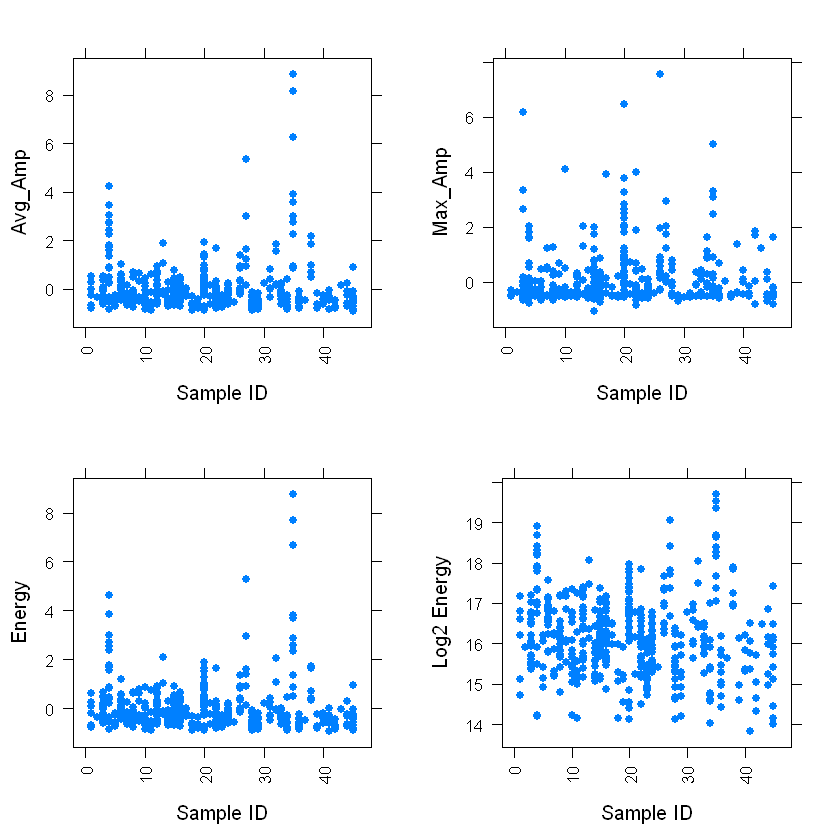

In [5]:
p1 = xyplot(avg_amp ~ sids, pch = 16, color = 'blue',xlab = 'Sample ID', ylab = 'Avg_Amp',
      scales=list(x=list(rot=90)))
p2 = xyplot(max_amp ~ sids, pch = 16, color = 'blue',xlab = 'Sample ID', ylab = 'Max_Amp',
      scales=list(x=list(rot=90)))
p3 = xyplot(energy ~ sids, pch = 16, color = 'blue',xlab = 'Sample ID', ylab = 'Energy',
      scales=list(x=list(rot=90)))
p4 = xyplot(log_energy ~ sids, pch = 16, color = 'blue',xlab = 'Sample ID', ylab = 'Log2 Energy',
      scales=list(x=list(rot=90)))

grid.arrange(p1,p2,p3,p4, ncol=2, nrow = 2)

### Logistic mixed model 

In [6]:
y = as.numeric(df$tremor) - 1
model = glmer(y ~ avg_amp + max_amp + log_energy + (1 | sids ), family = 'binomial',
             control= glmerControl(optimizer="bobyqa"))
              #, optCtrl=list(maxfun=3e5)) 
summary(model)

Warning message in checkConv(attr(opt, "derivs"), opt$par, ctrl = control$checkConv, :
"Model failed to converge with max|grad| = 0.0498897 (tol = 0.001, component 1)"

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: y ~ avg_amp + max_amp + log_energy + (1 | sids)
Control: glmerControl(optimizer = "bobyqa")

     AIC      BIC   logLik deviance df.resid 
    76.2     97.4    -33.1     66.2      506 

Scaled residuals: 
      Min        1Q    Median        3Q       Max 
-0.110658 -0.023890  0.001478  0.002273  0.006016 

Random effects:
 Groups Name        Variance Std.Dev.
 sids   (Intercept) 1355     36.81   
Number of obs: 511, groups:  sids, 45

Fixed effects:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) 15.475097   0.001421   10889   <2e-16 ***
avg_amp      0.667381   0.001421     470   <2e-16 ***
max_amp     -0.324293   0.001421    -228   <2e-16 ***
log_energy  -0.210467   0.001422    -148   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
           (Intr) avg_mp max_mp
avg_amp     0.

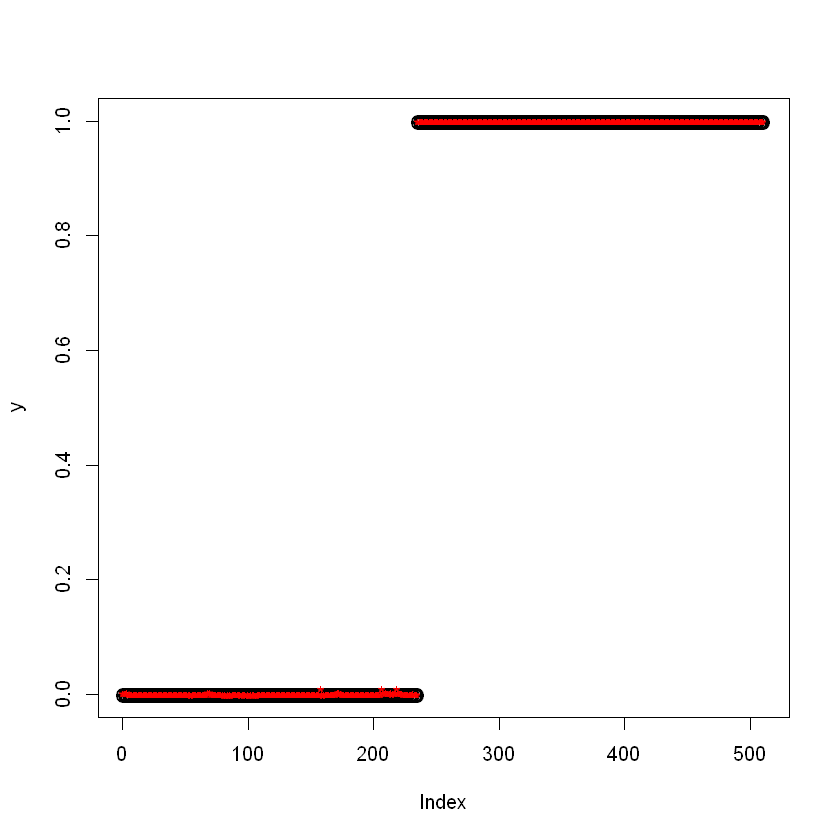

In [7]:
plot(y,pch='O',col='black')
points(fitted(model),pch ='*',col='red')

### Linear mixed model

In [8]:
y = as.numeric(df$tremor) - 1
model = lmer(y ~ avg_amp + max_amp + log_energy + (1 | sids ), control= lmerControl(optimizer="bobyqa")
              ,optCtrl=list(maxfun=1e6)) 
summary(model)

Warning message:
"extra argument(s) 'optCtrl' disregarded"Warning message in optwrap(optimizer, devfun, getStart(start, rho$lower, rho$pp), :
"convergence code 3 from bobyqa: bobyqa -- a trust region step failed to reduce q"

Linear mixed model fit by REML ['lmerMod']
Formula: y ~ avg_amp + max_amp + log_energy + (1 | sids)
Control: lmerControl(optimizer = "bobyqa")

REML criterion at convergence: -9703.5

Scaled residuals: 
       Min         1Q     Median         3Q        Max 
-1.606e-04 -7.529e-06  2.031e-06  8.189e-06  1.284e-04 

Random effects:
 Groups   Name        Variance  Std.Dev. 
 sids     (Intercept) 2.192e-02 1.480e-01
 Residual             4.012e-11 6.334e-06
Number of obs: 511, groups:  sids, 45

Fixed effects:
              Estimate Std. Error t value
(Intercept)  5.556e-01  2.207e-02   25.17
avg_amp      5.264e-11  7.432e-07    0.00
max_amp     -3.812e-11  3.774e-07    0.00
log_energy  -3.491e-12  6.701e-07    0.00

Correlation of Fixed Effects:
           (Intr) avg_mp max_mp
avg_amp     0.000              
max_amp     0.000 -0.271       
log_energy  0.000 -0.734 -0.076
convergence code: 3


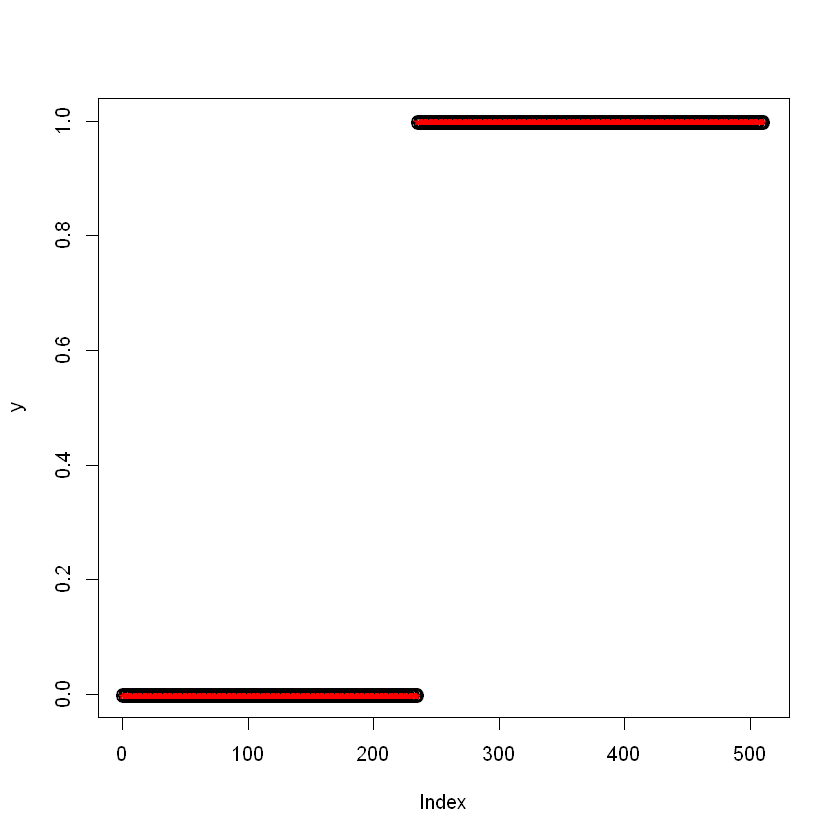

In [9]:
plot(y,pch='O',col='black')
points(fitted(model),pch ='*',col='red')


### Logistic model

In [10]:
y = as.numeric(df$tremor) - 1
model = glm(y ~ avg_amp + max_amp + log_energy, family = 'binomial')
summary(model)


Call:
glm(formula = y ~ avg_amp + max_amp + log_energy, family = "binomial")

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.8765  -1.2047   0.6695   1.0575   3.2262  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  10.9268     3.8988   2.803  0.00507 ** 
avg_amp       1.3818     0.3269   4.226 2.37e-05 ***
max_amp      -0.8287     0.1666  -4.973 6.60e-07 ***
log_energy   -0.6658     0.2403  -2.770  0.00560 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 705.10  on 510  degrees of freedom
Residual deviance: 652.28  on 507  degrees of freedom
AIC: 660.28

Number of Fisher Scoring iterations: 5


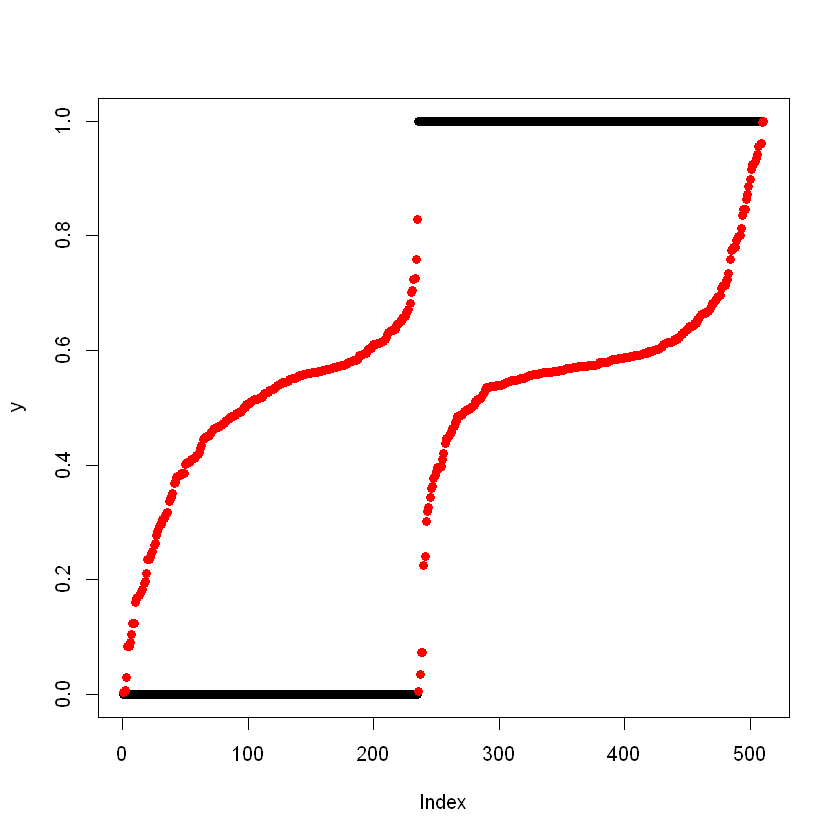

In [11]:
plot(y,pch=16,col='black')
res = fitted(model)
etr = sort(res[which(df$tremor == 'ET')])
pdr = sort(res[which(df$tremor == 'PD')])

res2 = c(etr,pdr)
points(res2,pch =16,col='red')

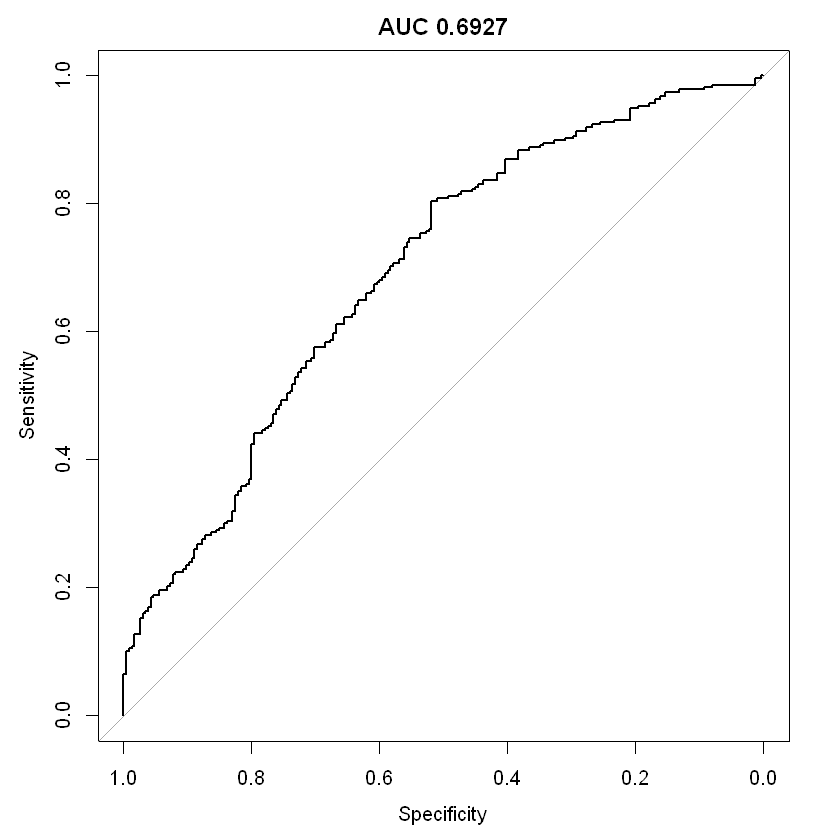

In [12]:
ROC = roc(response = y, predictor = res2)
plot.roc(ROC, main = paste('AUC',round(ROC$auc,4)))

### Linear model

In [13]:
y = as.numeric(df$tremor) - 1
model = lm(y ~ avg_amp + max_amp + log_energy)
summary(model)


Call:
lm(formula = y ~ avg_amp + max_amp + log_energy)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.7401 -0.5317  0.2920  0.4341  1.3333 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.94263    0.67362   2.884   0.0041 ** 
avg_amp      0.18765    0.04048   4.636 4.53e-06 ***
max_amp     -0.13629    0.02448  -5.568 4.17e-08 ***
log_energy  -0.08680    0.04167  -2.083   0.0377 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.4799 on 507 degrees of freedom
Multiple R-squared:  0.0802,	Adjusted R-squared:  0.07476 
F-statistic: 14.74 on 3 and 507 DF,  p-value: 3.259e-09


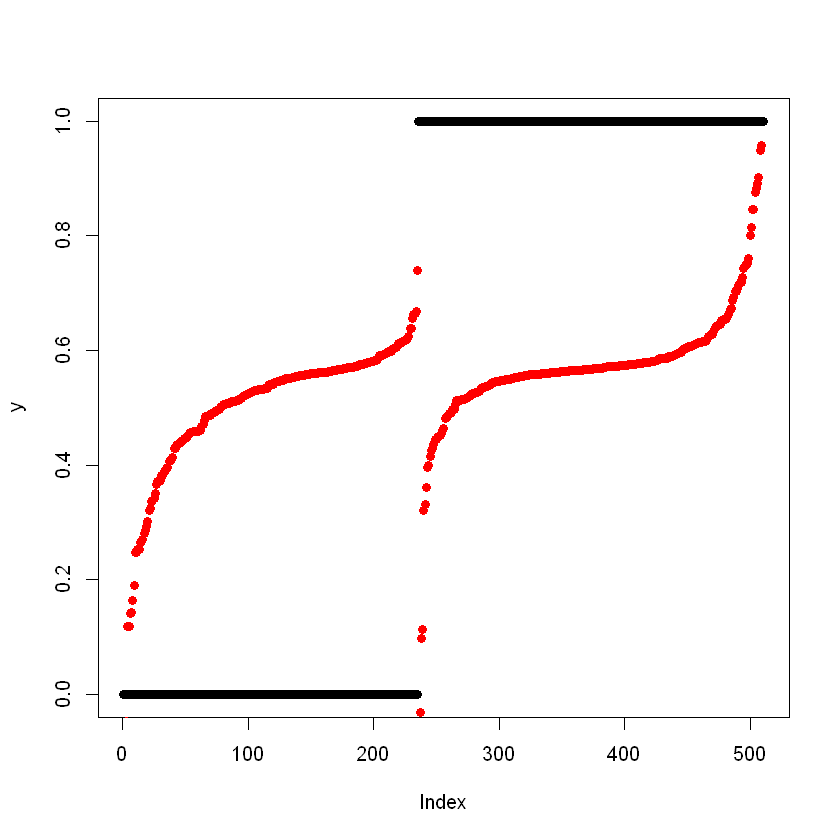

In [14]:
plot(y,pch=16,col='black')
res = fitted(model)
etr = sort(res[which(df$tremor == 'ET')])
pdr = sort(res[which(df$tremor == 'PD')])

res2 = c(etr,pdr)
points(res2,pch =16,col='red')

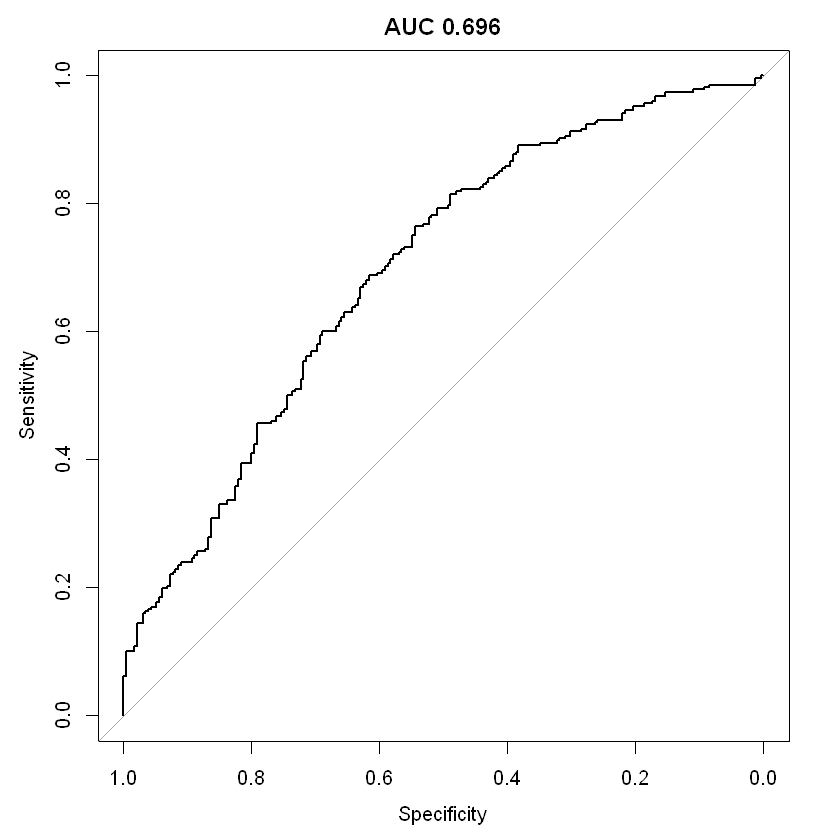

In [15]:
ROC = roc(response = y, predictor = res2)
plot.roc(ROC, main = paste('AUC',round(ROC$auc,4)))

### Logistic model with random sampling

In [ ]:
ss = unique(sids)
COEFF = c(0,0,0,0)
for (i in seq(10000))
    {
        rows = c()
        for (i in ss)
            {dis = which(sids == i)
             row_num = sample(dis,1)
             rows = c(rows,row_num)
            }

        sub_df = df[rows,]
        log_energy = log(sub_df$energy)
        y = as.numeric(sub_df$tremor) - 1
        model = glm(y ~ sub_df$avg_amp + sub_df$max_amp + log_energy, family = 'binomial')
        coeffs = model$coefficients
        COEFF = rbind(COEFF,coeffs)
    
    }

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning mess

In [ ]:
COEFF = COEFF[-1,]

In [ ]:
COEFF = as.data.frame(COEFF)
average_coeffs = sapply(COEFF,mean)

In [ ]:
average_coeffs

In [ ]:
y = as.numeric(df$tremor) - 1
log_energy = log(df$energy)
model = glm(y ~ avg_amp + max_amp + log_energy, family = 'binomial')
model$coefficients = average_coeffs

In [ ]:
plot(y,pch=16,col='black')
res = fitted(model)
etr = sort(res[which(df$tremor == 'ET')])
pdr = sort(res[which(df$tremor == 'PD')])

res2 = c(etr,pdr)
points(res2,pch =16,col='red')

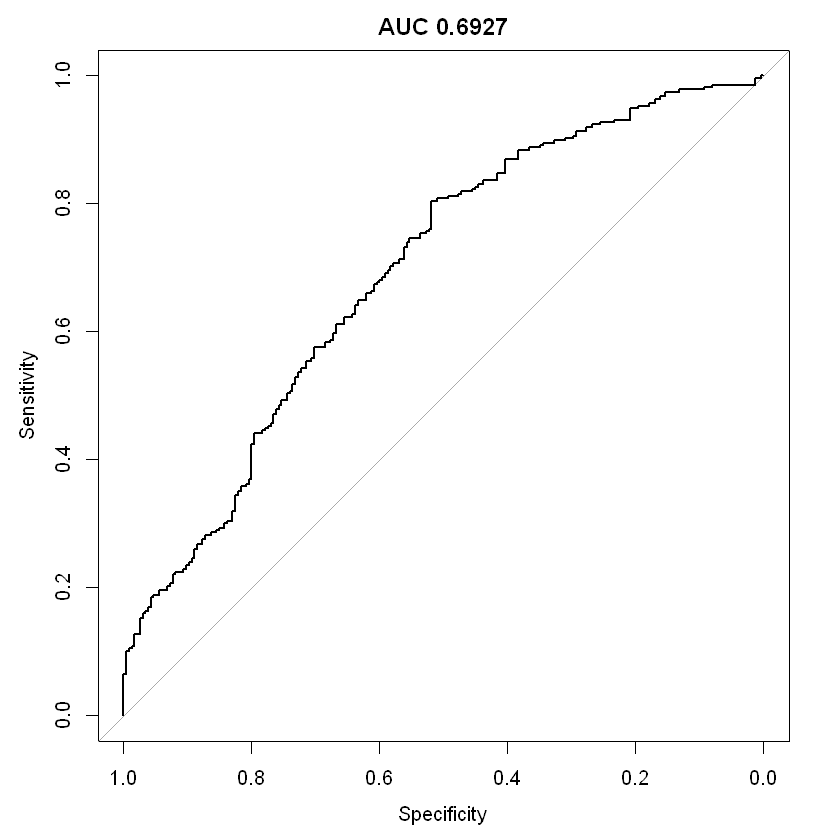

In [23]:
ROC = roc(response = y, predictor = res2)
plot.roc(ROC, main = paste('AUC',round(ROC$auc,4)))